# Klassifikation mit geringer Stichprobengröße

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Variables
- Pregnancies: Anzahl der Schwangerschaften
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    - The glucose tolerance test, also known as the oral glucose tolerance test, measures your body's response to sugar (glucose). The glucose tolerance test can be used to screen for type 2 diabetes. More commonly, a modified version of the glucose tolerance test is used to diagnose gestational diabetes — a type of diabetes that develops during pregnancy. 
    - If you're being tested for type 2 diabetes, two hours after drinking the glucose solution:
        - A normal blood glucose level is lower than 140 mg/dL (7.8 mmol/L).
        - A blood glucose level between 140 and 199 mg/dL (7.8 and 11 mmol/L) is considered impaired glucose tolerance, or prediabetes. If you have prediabetes, you're at risk of eventually developing type 2 diabetes. You're also at risk of developing heart disease, even if you don't develop diabetes.
        - A blood glucose level of 200 mg/dL (11.1 mmol/L) or higher may indicate diabetes.
    - Source: (https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296)
- BloodPressure: Diastolic blood pressure (mm Hg)
    - "Diabetes mellitus and hypertension are common diseases that coexist at a greater frequency than chance alone would predict." (https://pubmed.ncbi.nlm.nih.gov/1568757/)
- SkinThickness: Triceps skin fold thickness (mm)
    - "Skin thickness is primarily determined by collagen content and is increased in insulin-dependent diabetes mellitus (IDDM)" (https://pubmed.ncbi.nlm.nih.gov/2721339/)
- Insulin: 2-Hour serum insulin (mu U/ml)
- DiabetesPedigreeFunction: Diabetes pedigree function
    - Funktion, die Familiäres Risiko abbildet
- Age: Age in years


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.value_counts() / len(df.Outcome)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Wert 0 (s. min) bei Glucose, BloodPressure, SkinThickness, Insulin, BMI scheint fehlende Werte zu kennzeichnen. Datensatz ist bezogen auf das Outcome unbalanciert. 

In [7]:
cols_missings = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_missings] = df[cols_missings].replace(0,np.NaN)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Über die Hälfte der Werte bei Insulin fehlen, bei SkinThickness etwa ein Drittel.

### Behandlung fehlender Werte

In [10]:
label_df = df.loc[:, df.columns == 'Outcome']
label_df.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [11]:
feature_df = df.loc[:, df.columns != 'Outcome']
feature_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_df)
df_s = pd.DataFrame(scaler.transform(feature_df), columns=feature_df.columns)

In [13]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer.fit(df_s) # Could use unscaled df as well
# Inverse transform to use a scaler fit on training data later on
# https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data
df_mean = pd.DataFrame(scaler.inverse_transform(mean_imputer.transform(df_s)), columns=df_s.columns).join(label_df)
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [14]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_imputer.fit(df_s)
# Inverse transform to use a scaler fit on training data later on
# https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data
df_knn = pd.DataFrame(scaler.inverse_transform(knn_imputer.transform(df_s)), columns=df_s.columns).join(label_df)
df_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,147.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,49.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,37.5,227.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [15]:
"""
A more sophisticated approach is to use the IterativeImputer class, 
which models each feature with missing values as a function of other features, 
and uses that estimate for imputation (sklearn documentation)
"""
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputer.fit(df_s)
# Inverse transform to use a scaler fit on training data later on
# https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data
df_iter = pd.DataFrame(scaler.inverse_transform(iter_imputer.transform(df_s)), columns=df_s.columns).join(label_df)
df_iter.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,221.089959,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,72.163586,26.6,0.351,31.0,0
2,8.0,183.0,64.0,21.619315,255.228525,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1


In [16]:
dfs = [(df_mean, 'Mean'), (df_knn, 'knn'), (df_iter, 'iter')]

## Data Exploration

Text(0.5, 1.0, 'df_iter')

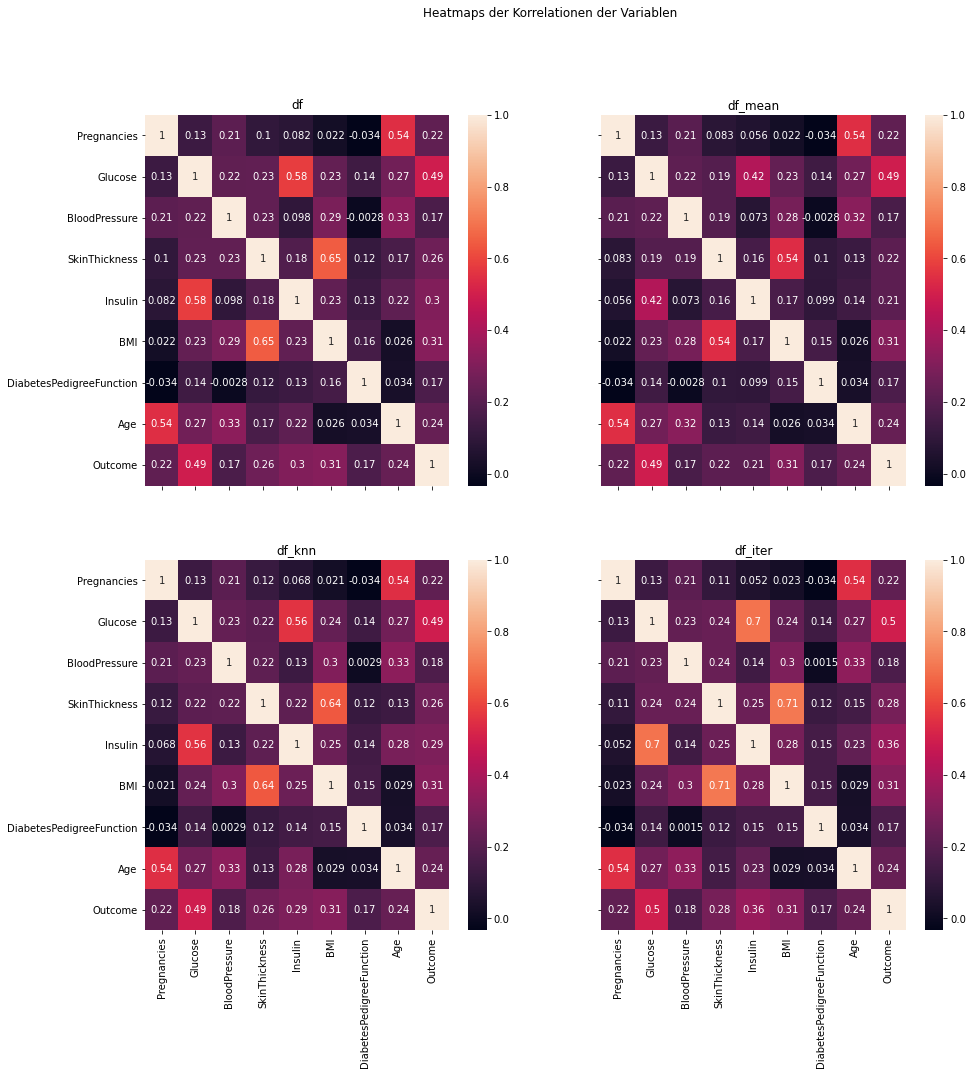

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True, sharex=True)
fig.suptitle('Heatmaps der Korrelationen der Variablen')

sns.heatmap(df.corr(), ax=axes[0][0], annot=True)
axes[0][0].set_title('df')

sns.heatmap(df_mean.corr(), ax=axes[0][1], annot=True)
axes[0][1].set_title('df_mean')

sns.heatmap(df_knn.corr(), ax=axes[1][0], annot=True)
axes[1][0].set_title('df_knn')

sns.heatmap(df_iter.corr(), ax=axes[1][1], annot=True)
axes[1][1].set_title('df_iter')

Teils deutliche Unterschiede zwischen den Varianten der Imputationen in den Korrelationen bei Insulin und SkinThickness. Z.B. Korrelation Insulin und Glucose 0.58, 0.42, 0.56, 0.7.  
Nicht völlig verwunderlich, da Mean-Imputation Varianz in den Variablen/Features reduziert und Iterative Imputation nicht deterministisch abläuft.

## Feature Selection

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
for dataframe, imputemethod in dfs:
    x=dataframe[dataframe.columns[:8]]
    y=df_knn.Outcome
    clf.fit(x,y)
    feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
    print(imputemethod, '\n', feature_imp.sort_values(by = 0 , ascending = False),'\n')

Mean 
                                  0
Glucose                   0.256055
BMI                       0.160250
Age                       0.135783
DiabetesPedigreeFunction  0.121310
Insulin                   0.087146
BloodPressure             0.083079
Pregnancies               0.079530
SkinThickness             0.076847 

knn 
                                  0
Glucose                   0.218206
Insulin                   0.163354
BMI                       0.145409
Age                       0.121807
DiabetesPedigreeFunction  0.109583
SkinThickness             0.096415
BloodPressure             0.074413
Pregnancies               0.070813 

iter 
                                  0
Glucose                   0.208121
Insulin                   0.178097
BMI                       0.139762
Age                       0.120643
DiabetesPedigreeFunction  0.105329
SkinThickness             0.097810
BloodPressure             0.076821
Pregnancies               0.073416 



Es zeigen sich unterschiede in der Wichtigkeit der Features in Abhängigkeit von der gewählten Imputation.

In [19]:
features_mean = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
features_knn = ['Glucose', 'Insulin', 'BMI', 'Age']
features_mean = ['Glucose', 'Insulin', 'BMI','Age']
all_features = ['Glucose', 'Insulin', 'BMI', 'Age','DiabetesPedigreeFunction', 'SkinThickness', 'BloodPressure', 'Pregnancies']

In [20]:
features = df_mean[features_mean].values
labels = df_mean['Outcome'].values

In [21]:
features.shape

(768, 4)

## Einfaches dichtes NN

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [23]:
def simple_nn():
    simple_nn = Sequential()
    simple_nn.add(Dense(16, input_dim=4, activation='relu'))
    simple_nn.add(Dense(1, activation='sigmoid'))
    simple_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return simple_nn

In [24]:
def deeper_nn():
    deeper_nn = Sequential()
    deeper_nn.add(Dense(128, input_dim=4, activation='relu'))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(Dense(1, activation='sigmoid'))
    deeper_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return deeper_nn

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
simple_clf = KerasClassifier(simple_nn, epochs=1000, batch_size=32, verbose=0)
deeper_clf = KerasClassifier(deeper_nn, epochs=1000, batch_size=32, verbose=0)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

kfold =KFold(n_splits=10)
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes", "Simpe NN", 'Deeper NN']
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB(), simple_clf, deeper_clf]
cv_results=[]

for classifiers in clfs:
    clf = make_pipeline(StandardScaler(), classifiers)
    cv_score = cross_val_score(clf,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())

cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]

/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it us

/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it us

In [28]:
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Simpe NN,0.773394
Logistic Regression,0.770865
Support Vector Machine,0.765636
Naive Bayes,0.757792
K Nearest Neighbor,0.721309
Deeper NN,0.716046
Decision Tree,0.679460


Das tiefere NN performt schlechter als das sehr simple NN. Dies liegt vermutlich an einem Overfitting.

In [29]:
from keras.layers import Dropout, BatchNormalization
def optimized_nn():
    deeper_nn = Sequential()
    deeper_nn.add(Dense(128, input_dim=4, activation='relu'))
    deeper_nn.add(BatchNormalization())
    deeper_nn.add(Dropout(.2))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(BatchNormalization())
    deeper_nn.add(Dropout(.2))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(BatchNormalization())
    deeper_nn.add(Dropout(.2))
    deeper_nn.add(Dense(128, activation='relu'))
    deeper_nn.add(BatchNormalization())
    deeper_nn.add(Dropout(.2))
    deeper_nn.add(Dense(1, activation='sigmoid'))
    deeper_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return deeper_nn

In [30]:
optimized_clf = KerasClassifier(optimized_nn, epochs=1000, batch_size=32, verbose=0)
clf = make_pipeline(StandardScaler(), classifiers)
cv_score = cross_val_score(clf,features,labels,cv=kfold,scoring="accuracy")

/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/ubbonolte/bin/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it us

In [31]:
cv_score.mean()

0.7212576896787424

# Optimierung Simple NN

In [32]:
features = df_iter[all_features].values
labels = df_iter['Outcome'].values

In [40]:
simple_nn = Sequential()
simple_nn.add(Dense(10, input_dim=8, activation='relu'))
simple_nn.add(Dense(1, activation='sigmoid'))
simple_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [41]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=1/7.0, random_state=0)
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [102]:
simple_history = simple_nn.fit(train_features, train_labels, epochs=1000, batch_size=32, verbose=0, validation_split=.1)

In [103]:
simple_nn.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7909


[0.5271503329277039, 0.7909091114997864]

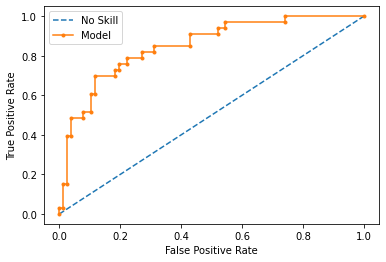

In [104]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
yhat = simple_nn.predict(test_features)
# keep probabilities for the positive outcome only
#yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_labels, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## Visualize Loss-Functions

In [105]:
deeper_nn = Sequential()
deeper_nn.add(Dense(128, input_dim=8, activation='relu'))
deeper_nn.add(BatchNormalization())
deeper_nn.add(Dropout(.2))
deeper_nn.add(Dense(128, activation='relu'))
deeper_nn.add(BatchNormalization())
deeper_nn.add(Dropout(.2))
deeper_nn.add(Dense(128, activation='relu'))
deeper_nn.add(BatchNormalization())
deeper_nn.add(Dropout(.2))
deeper_nn.add(Dense(128, activation='relu'))
deeper_nn.add(BatchNormalization())
deeper_nn.add(Dropout(.2))
deeper_nn.add(Dense(1, activation='sigmoid'))
deeper_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
deeper_nn_history = deeper_nn.fit(features,labels,epochs=1000, batch_size=32, verbose=0, validation_split=.1)

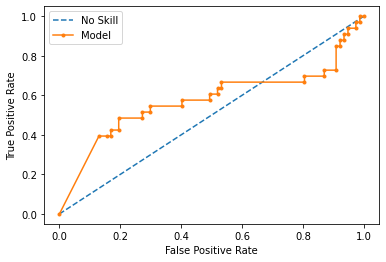

In [106]:
yhat = deeper_nn.predict(test_features)
# keep probabilities for the positive outcome only
#yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_labels, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

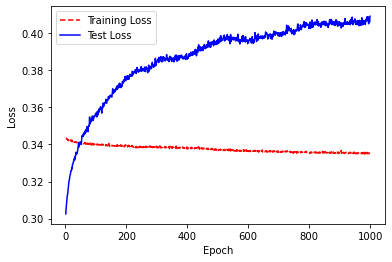

In [107]:
# Get training and test loss histories
training_loss = simple_history.history['loss']
test_loss = simple_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


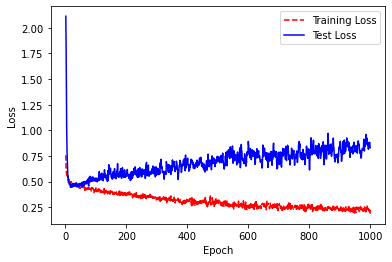

In [108]:
# Get training and test loss histories
training_loss = deeper_nn_history.history['loss']
test_loss = deeper_nn_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()